In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('./climate_change_data.csv',parse_dates=['Date'])
data

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164
...,...,...,...,...,...,...,...,...,...
9995,2022-12-27 15:21:06.966696576,South Elaineberg,Bhutan,15.020523,391.379537,-1.452243,93.417109,25.293814,6.531866
9996,2022-12-28 11:30:50.225022464,Leblancville,Congo,16.772451,346.921190,0.543616,49.882947,96.787402,42.249014
9997,2022-12-29 07:40:33.483348224,West Stephanie,Argentina,22.370025,466.042136,1.026704,30.659841,15.211825,18.293708
9998,2022-12-30 03:50:16.741674112,Port Steven,Albania,19.430853,337.899776,-0.895329,18.932275,82.774520,42.424255


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            10000 non-null  datetime64[ns]
 1   Location        10000 non-null  object        
 2   Country         10000 non-null  object        
 3   Temperature     10000 non-null  float64       
 4   CO2 Emissions   10000 non-null  float64       
 5   Sea Level Rise  10000 non-null  float64       
 6   Precipitation   10000 non-null  float64       
 7   Humidity        10000 non-null  float64       
 8   Wind Speed      10000 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 703.2+ KB


In [4]:
data.describe()

,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,14.936034,400.220469,-0.003152,49.881208,49.771302,25.082066
std,5.030616,49.696933,0.991349,28.862417,28.929320,14.466648
min,-3.803589,182.131220,-4.092155,0.010143,0.018998,0.001732
25%,11.577991,367.109330,-0.673809,24.497516,24.713250,12.539733
50%,14.981136,400.821324,0.002332,49.818967,49.678412,24.910787
75%,18.305826,433.307905,0.675723,74.524991,75.206390,37.670260
max,33.976956,582.899701,4.116559,99.991900,99.959665,49.997664


In [5]:
data.shape

(10000, 9)

In [6]:
data.isnull().sum()

Date              0
Location          0
Country           0
Temperature       0
CO2 Emissions     0
Sea Level Rise    0
Precipitation     0
Humidity          0
Wind Speed        0
dtype: int64

In [7]:
data['year']=data.Date.dt.year
data['month']=data.Date.dt.month
data['day']=data.Date.dt.day
data['time']=data.Date.dt.time

In [8]:
data.head(10)

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,year,month,day,time
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,2000,1,1,00:00:00
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,2000,1,1,20:09:43.258325
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261,2000,1,2,16:19:26.516651
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563,2000,1,3,12:29:09.774977
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164,2000,1,4,08:38:53.033303
5,2000-01-05 04:48:36.291629162,South Nathan,Saint Helena,6.229326,392.473317,1.122210,76.368331,48.973886,30.398908,2000,1,5,04:48:36.291629
6,2000-01-06 00:58:19.549954995,Port Richardfurt,Tuvalu,21.646738,387.648437,0.058471,9.650389,11.402284,15.720944,2000,1,6,00:58:19.549954
7,2000-01-06 21:08:02.808280828,Adambury,Australia,19.730800,448.180275,0.001415,93.360755,21.526350,29.993495,2000,1,6,21:08:02.808280
8,2000-01-07 17:17:46.066606660,Williamsonberg,Qatar,19.858114,379.618820,0.584881,6.218846,30.861949,37.519472,2000,1,7,17:17:46.066606
9,2000-01-08 13:27:29.324932493,North Thomas,Chad,14.121563,410.517072,-1.712224,15.351583,88.422794,47.922521,2000,1,8,13:27:29.324932


In [9]:
data.drop(columns='Date',inplace=True)

In [10]:
data.head(10)

,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,year,month,day,time
0,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,2000,1,1,00:00:00
1,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,2000,1,1,20:09:43.258325
2,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261,2000,1,2,16:19:26.516651
3,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563,2000,1,3,12:29:09.774977
4,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164,2000,1,4,08:38:53.033303
5,South Nathan,Saint Helena,6.229326,392.473317,1.122210,76.368331,48.973886,30.398908,2000,1,5,04:48:36.291629
6,Port Richardfurt,Tuvalu,21.646738,387.648437,0.058471,9.650389,11.402284,15.720944,2000,1,6,00:58:19.549954
7,Adambury,Australia,19.730800,448.180275,0.001415,93.360755,21.526350,29.993495,2000,1,6,21:08:02.808280
8,Williamsonberg,Qatar,19.858114,379.618820,0.584881,6.218846,30.861949,37.519472,2000,1,7,17:17:46.066606
9,North Thomas,Chad,14.121563,410.517072,-1.712224,15.351583,88.422794,47.922521,2000,1,8,13:27:29.324932


In [11]:
#5 country with highest temperature
data.nlargest(5,'Temperature')

,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,year,month,day,time
5601,Bradleyport,Niger,33.976956,370.009529,-1.173126,53.160033,47.798918,16.571780,2012,11,18,07:27:09.882988
9228,East Lauren,Reunion,33.907976,330.584735,1.198054,49.407325,47.492751,5.970861,2021,3,23,07:05:07.830782
4370,Kellychester,Libyan Arab Jamahiriya,32.745123,401.100887,0.738020,43.153489,31.687472,49.045713,2010,1,19,04:00:38.883888
2839,Lake Johnbury,Malawi,32.403159,352.800570,0.836593,90.012918,37.163428,40.449947,2006,7,12,23:57:50.387038
2224,Perezborough,Uruguay,31.455420,469.597143,0.815082,66.393905,15.000543,45.734782,2005,2,11,08:19:26.516651


In [12]:
data.nsmallest(5,'Temperature')

,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,year,month,day,time
7663,East Edward,Liechtenstein,-3.803589,350.546781,-0.875512,17.935275,79.957867,7.698461,2017,8,16,13:31:48.550855
946,East Natalie,Papua New Guinea,-3.709565,379.473011,-0.143163,16.863249,16.392423,11.529109,2002,3,5,17:16:02.376237
4822,West Scott,Cocos (Keeling) Islands,-2.921056,311.313077,-1.424291,56.324695,22.250803,37.535689,2011,2,2,21:14:31.647164
6864,North Cheryl,Nigeria,-2.487518,438.977910,-1.049800,79.247839,12.034458,43.774996,2015,10,15,08:04:45.148514
7990,South Christian,Paraguay,-2.338728,448.888356,-0.344957,20.700572,59.211328,17.508389,2018,5,18,06:30:34.023402


<AxesSubplot:>

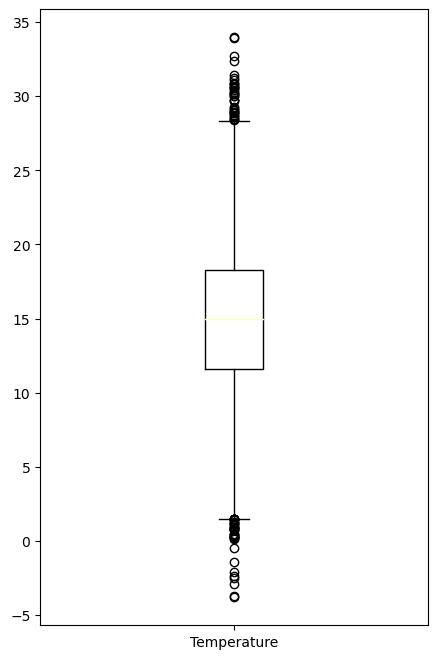

In [13]:
data.Temperature.plot.box(figsize=(5,8),cmap='magma')

<AxesSubplot:>

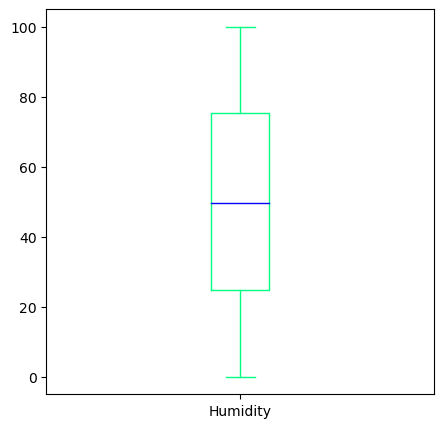

In [14]:
data.Humidity.plot.box(figsize=(5,5),cmap='winter_r')

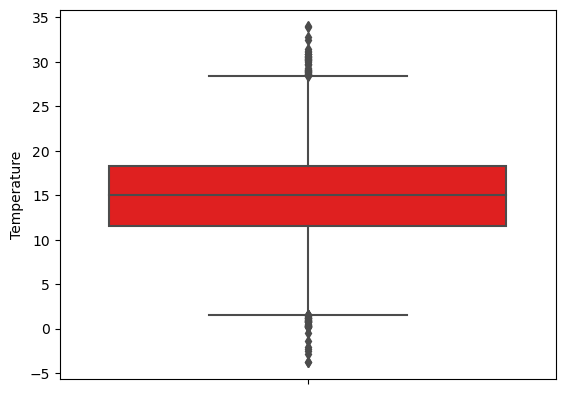

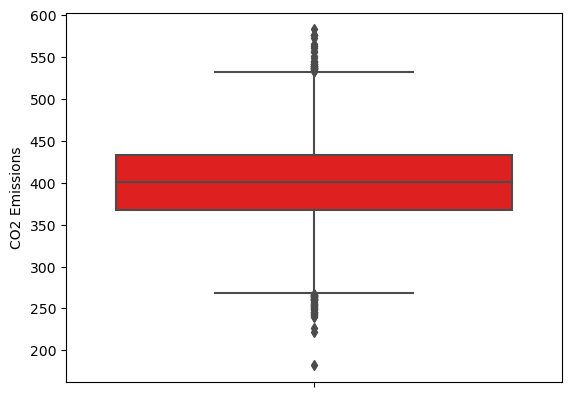

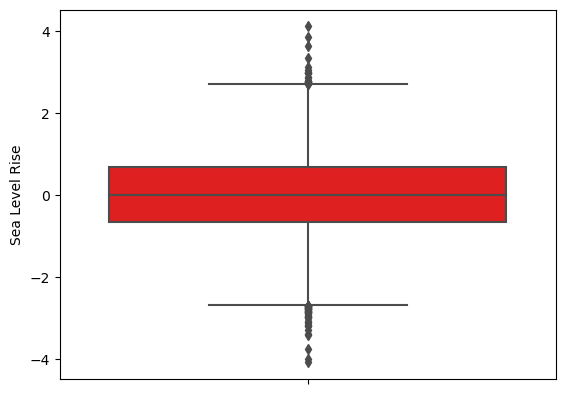

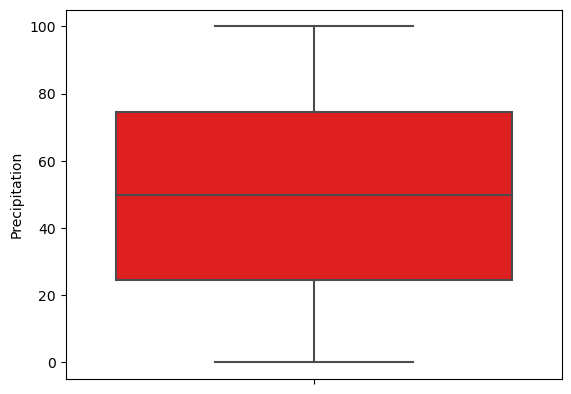

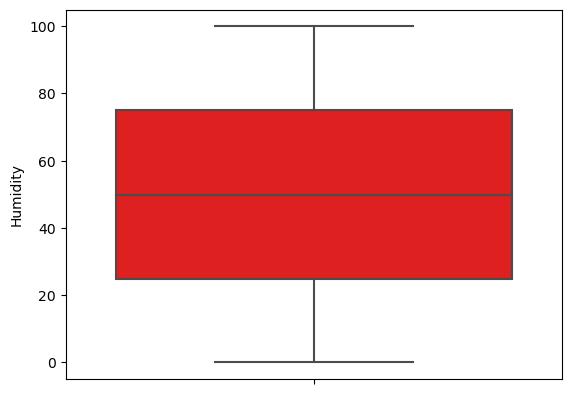

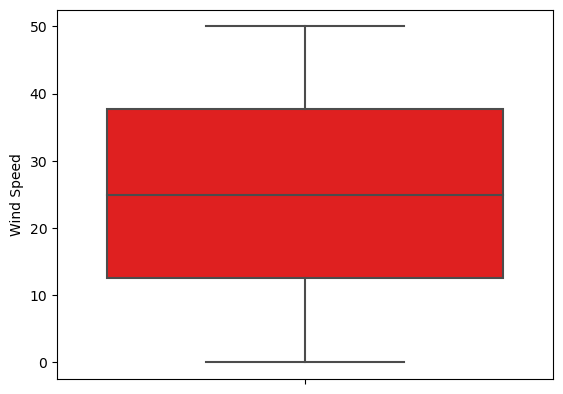

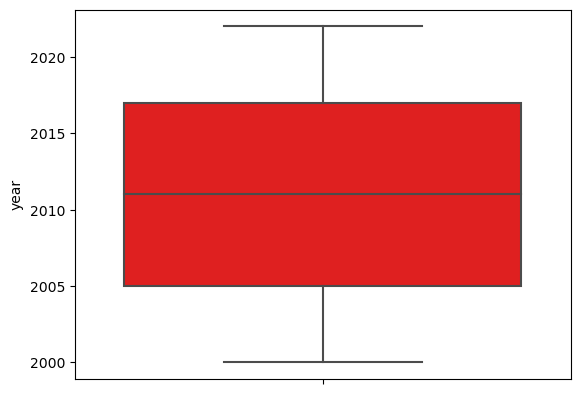

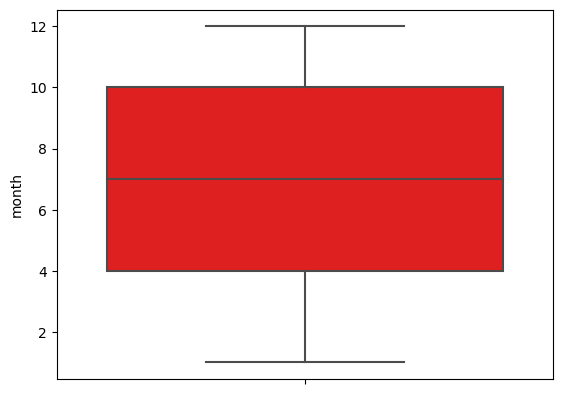

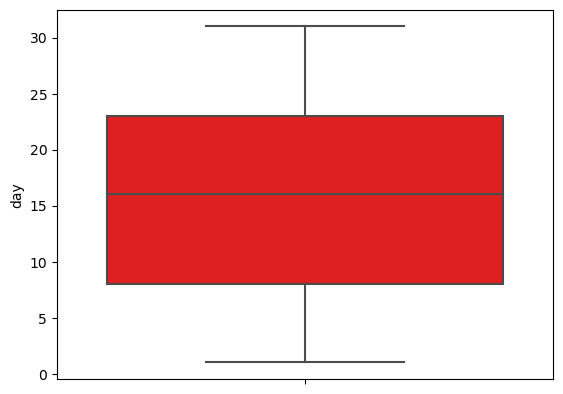

In [15]:
for i in data.columns:
    if data[i].dtypes!='object':
        sns.boxplot(y=data[i],color='red')
        plt.show()

In [16]:
#temprature,CO2 Emissions,Sea Level Rise have outliers

In [17]:
data.columns

Index(['Location', 'Country', 'Temperature', 'CO2 Emissions', 'Sea Level Rise',
       'Precipitation', 'Humidity', 'Wind Speed', 'year', 'month', 'day',
       'time'],
      dtype='object')

In [18]:
data.query('Temperature>30&Humidity>35').sort_values(by='year')

,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,year,month,day,time
544,Moraborough,Liechtenstein,30.609992,420.796144,-0.257760,67.978381,58.082146,14.480108,2001,4,2,00:08:12.529252
877,East Meganshire,Bahrain,30.556774,283.716379,2.404841,76.699991,80.005142,25.268714,2002,1,6,18:05:17.551755
1195,Malonefort,China,30.249102,420.932290,0.943104,45.733431,87.003256,5.736739,2002,9,30,21:36:33.699369
1995,Campbellshire,Georgia,30.270203,363.336189,-0.224672,22.005700,83.192014,27.302722,2004,8,2,23:13:20.360036
2839,Lake Johnbury,Malawi,32.403159,352.800570,0.836593,90.012918,37.163428,40.449947,2006,7,12,23:57:50.387038
5070,Averyview,Italy,30.183149,312.393265,0.568104,4.417724,80.726670,27.722953,2011,8,30,05:25:19.711971
5601,Bradleyport,Niger,33.976956,370.009529,-1.173126,53.160033,47.798918,16.571780,2012,11,18,07:27:09.882988
5949,West Erikaland,Thailand,31.092676,382.500307,-1.699990,38.240202,99.685118,39.666770,2013,9,6,15:50:03.780377
7341,New Reneeborough,Rwanda,30.183415,417.969002,1.529484,49.053406,60.629908,44.847275,2016,11,19,01:21:39.369936
8700,Lake Julianfurt,Bolivia,30.040132,412.777466,0.129312,59.594772,63.984917,4.876842,2020,1,4,17:32:27.434743


In [33]:
d1=data.query("Country=='China'").sort_values(by='year')
d1.head(10)

,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,year,month,day,time
71,East Melissaville,China,13.851353,369.247935,-0.858611,77.186136,46.974568,3.254734,2000,2,29,15:30:11.341134
308,North Staceystad,China,15.146316,417.680054,1.692880,75.556312,20.407404,46.468095,2000,9,15,17:54:03.564356
340,Hoganview,China,10.089492,483.491202,-0.386739,49.436250,76.029412,19.943625,2000,10,12,15:05:07.830783
426,North Joseph,China,10.766770,421.875066,-0.710347,65.776099,42.170360,28.834886,2000,12,23,21:01:08.046804
492,Harrisside,China,12.497702,432.257391,0.369399,52.799357,29.319556,25.030887,2001,2,17,07:42:43.096309
718,West Ericberg,China,14.258370,395.829235,-1.161902,38.430244,6.758108,43.015026,2001,8,26,04:19:39.477947
745,South Debrashire,China,12.621875,403.774083,-0.379093,44.843092,63.155720,46.892563,2001,9,17,20:42:07.452745
1258,Simpsonfort,China,13.916290,449.816581,2.139217,60.571042,60.670664,34.179165,2002,11,22,19:48:58.973897
1215,Davisborough,China,15.711546,386.735849,-0.587522,98.130418,35.507359,47.602071,2002,10,17,16:50:58.865886
1195,Malonefort,China,30.249102,420.932290,0.943104,45.733431,87.003256,5.736739,2002,9,30,21:36:33.699369


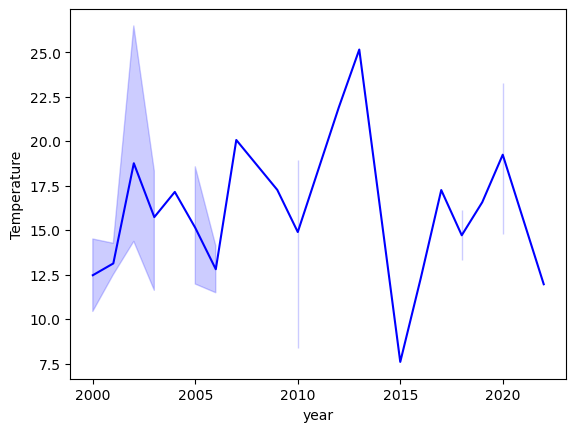

In [36]:
sns.lineplot(data=d1,x='year',y='Temperature',color='Blue')
plt.show()

In [35]:
# data[:25].plot.bar('Country','Temperature')

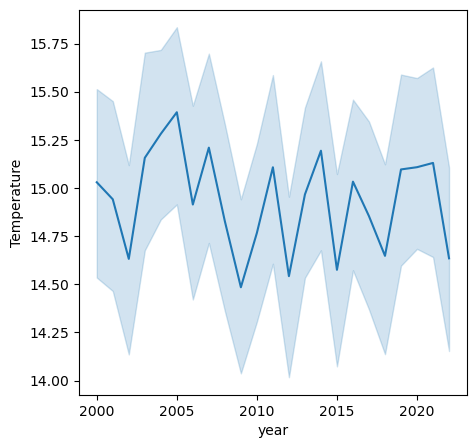

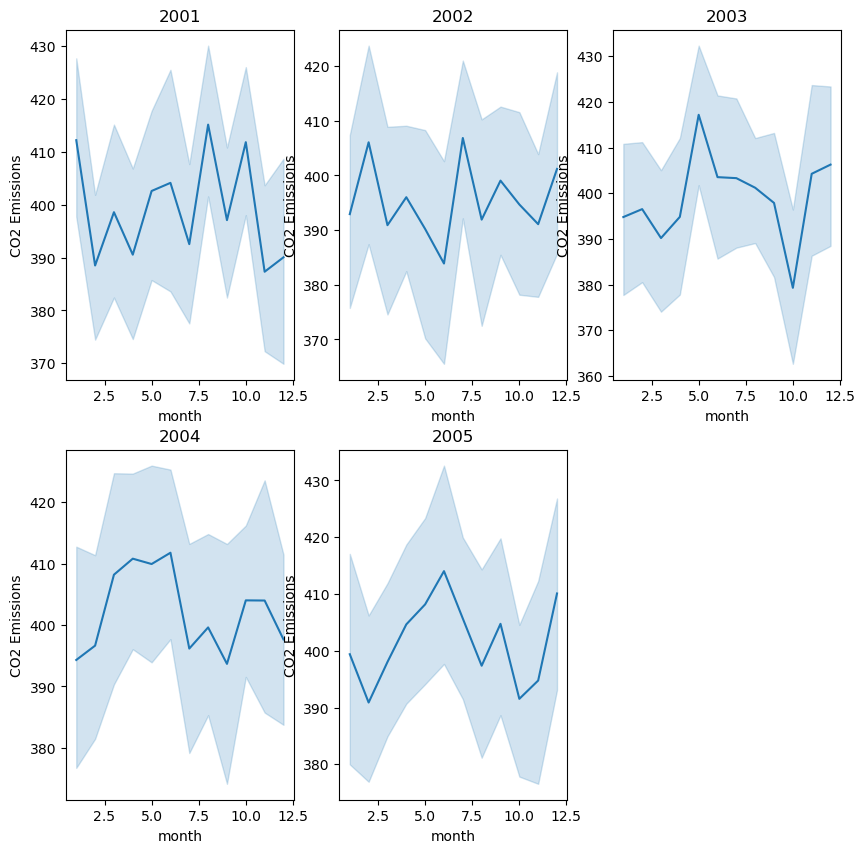

In [99]:
plt.figure(figsize=(5,5))
sns.lineplot(data=data,x='year',y='Temperature')
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(2,3,1)
plt.title('2001')
d2=data.query('year==2001')
d2.sort_values(by='month',inplace=True)
sns.lineplot(data=d2,x='month',y='CO2 Emissions');

plt.subplot(2,3,2)
plt.title('2002')
d3=data.query('year==2002')
d3.sort_values(by='month',inplace=True)
sns.lineplot(data=d3,x='month',y='CO2 Emissions');

plt.subplot(2,3,3)
plt.title('2003')
d4=data.query('year==2003')
d4.sort_values(by='month',inplace=True)
sns.lineplot(data=d4,x='month',y='CO2 Emissions');

plt.subplot(2,3,4)
plt.title('2004')
d5=data.query('year==2004')
d5.sort_values(by='month',inplace=True)
sns.lineplot(data=d5,x='month',y='CO2 Emissions');

plt.subplot(2,3,5)
plt.title('2005')
d6=data.query('year==2005')
d6.sort_values(by='month',inplace=True)
sns.lineplot(data=d6,x='month',y='CO2 Emissions');



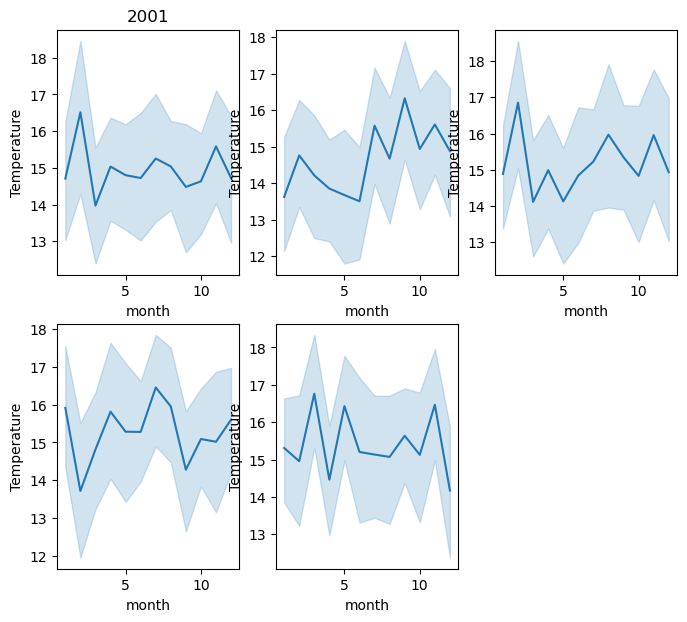

In [97]:
plt.figure(figsize=(8,7))
plt.subplot(2,3,1)
plt.title('2001')
d2=data.query('year==2001')
d2.sort_values(by='month',inplace=True)
sns.lineplot(data=d2,x='month',y='Temperature');

plt.subplot(2,3,2)
plt.title('2001')
d3=data.query('year==2002')
d3.sort_values(by='month',inplace=True)
sns.lineplot(data=d3,x='month',y='Temperature');

plt.subplot(2,3,3)
plt.title('2001')
d4=data.query('year==2003')
d4.sort_values(by='month',inplace=True)
sns.lineplot(data=d4,x='month',y='Temperature');

plt.subplot(2,3,4)
d5=data.query('year==2004')
d5.sort_values(by='month',inplace=True)
sns.lineplot(data=d5,x='month',y='Temperature');

plt.subplot(2,3,5)
d6=data.query('year==2005')
d6.sort_values(by='month',inplace=True)
d6
sns.lineplot(data=d6,x='month',y='Temperature');

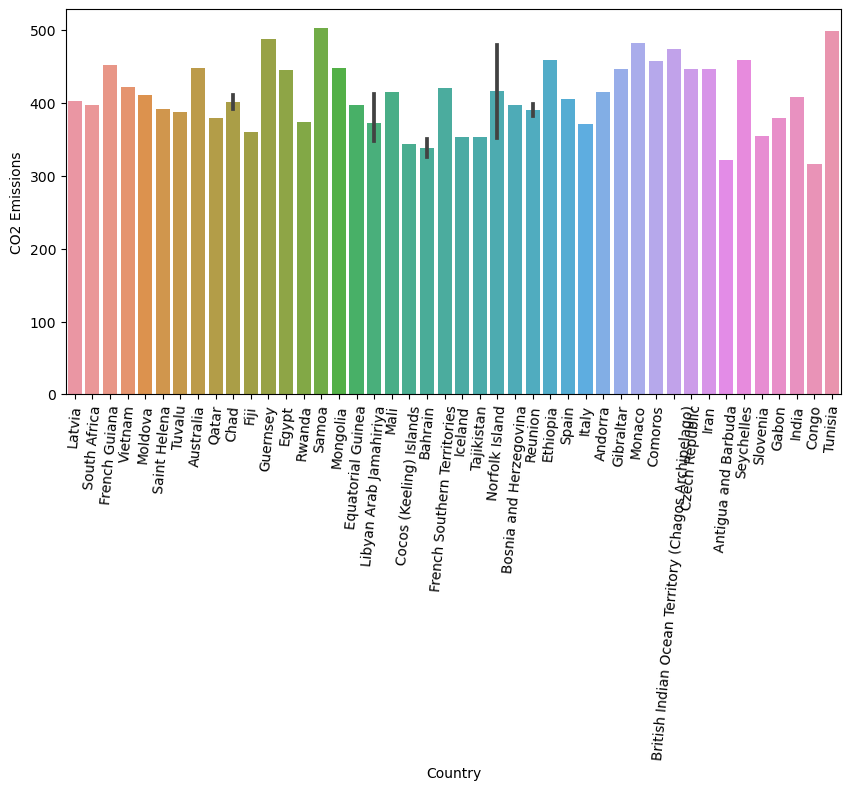

In [105]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=85)
sns.barplot(data=data[:50],x='Country',y='CO2 Emissions')
plt.show()

In [106]:
data.head()

,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,year,month,day,time
0,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,2000,1,1,00:00:00
1,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,2000,1,1,20:09:43.258325
2,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261,2000,1,2,16:19:26.516651
3,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563,2000,1,3,12:29:09.774977
4,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164,2000,1,4,08:38:53.033303


<AxesSubplot:xlabel='Temperature', ylabel='Sea Level Rise'>

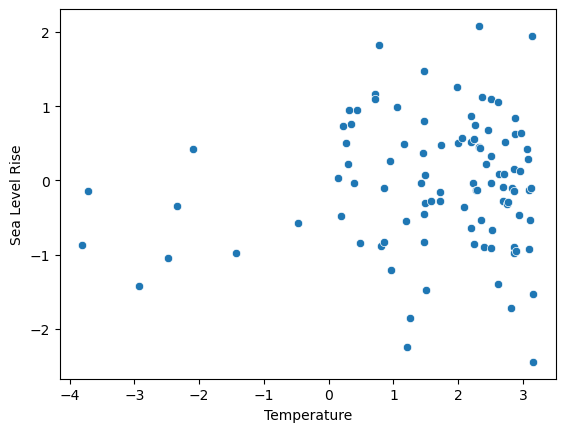

In [109]:
d10=data.sort_values(by='Temperature')
sns.scatterplot(data=d10[:100],x='Temperature',y='Sea Level Rise')